In [1]:
import numpy as np
from MEAData import MEAData
import spike_train_tools as stt
import glob
import matplotlib.pyplot as plt

In [4]:
folders = glob.glob('C:\\Users\\bow-lab\\Documents\\Code\\data\\240917_results\\24039_results\\000*')

files = []

for folder in folders:
    files.append(f'{folder}\\sorted.npz')

MEA_data = MEAData(files[0], file_type='raw', pressure=2.14, overview=False)

pressures = np.array([2.14, 4.44, 6.54, 8.56, 10.18, 11.75, 16.02, 18.03, 20.12,
                      0,    2.17, 4.29, 4.29, 6.33, 9.09, 10.16, 14.09, 16.12, 18.00, 20.0])

IndexError: arrays used as indices must be of integer (or boolean) type

In [5]:
files[9]

'C:\\Users\\bow-lab\\Documents\\Code\\data\\240917_results\\24039_results\\000287\\sorted.npz'

In [3]:
MEA_data.compute_sttc(dt=50)

Make tilings...


379it [00:01, 276.24it/s]


Calculating STTC...


100%|██████████| 379/379 [07:38<00:00,  1.21s/it]


Plotting...


array([[ 1.        ,  0.73856989,  0.35136466, ...,  0.00656246,
        -0.02683393,  0.12811948],
       [ 0.73856989,  1.        ,  0.52232495, ..., -0.0159459 ,
        -0.03970523,  0.35777459],
       [ 0.35136466,  0.52232495,  1.        , ..., -0.016411  ,
        -0.02675761,  0.23331417],
       ...,
       [ 0.00656246, -0.0159459 , -0.016411  , ...,  1.        ,
         0.18619642, -0.03038016],
       [-0.02683393, -0.03970523, -0.02675761, ...,  0.18619642,
         1.        , -0.00233081],
       [ 0.12811948,  0.35777459,  0.23331417, ..., -0.03038016,
        -0.00233081,  1.        ]])

In [4]:
np.shape(MEA_data.locs)

(379, 2)

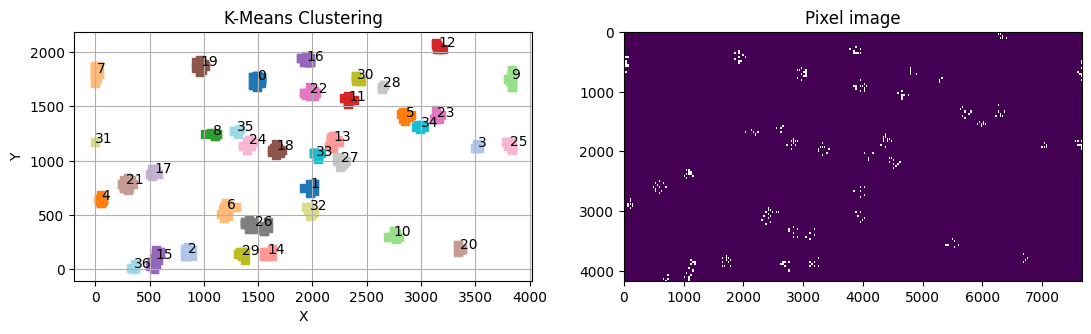

c:\Users\bow-lab\Documents\Code\scripts\MEAData.py:446: RuntimeWarning: Mean of empty slice
  sttc_cluster = np.nanmean(sttc_result_ordered[labels_ordered == i][:,labels_ordered == j])


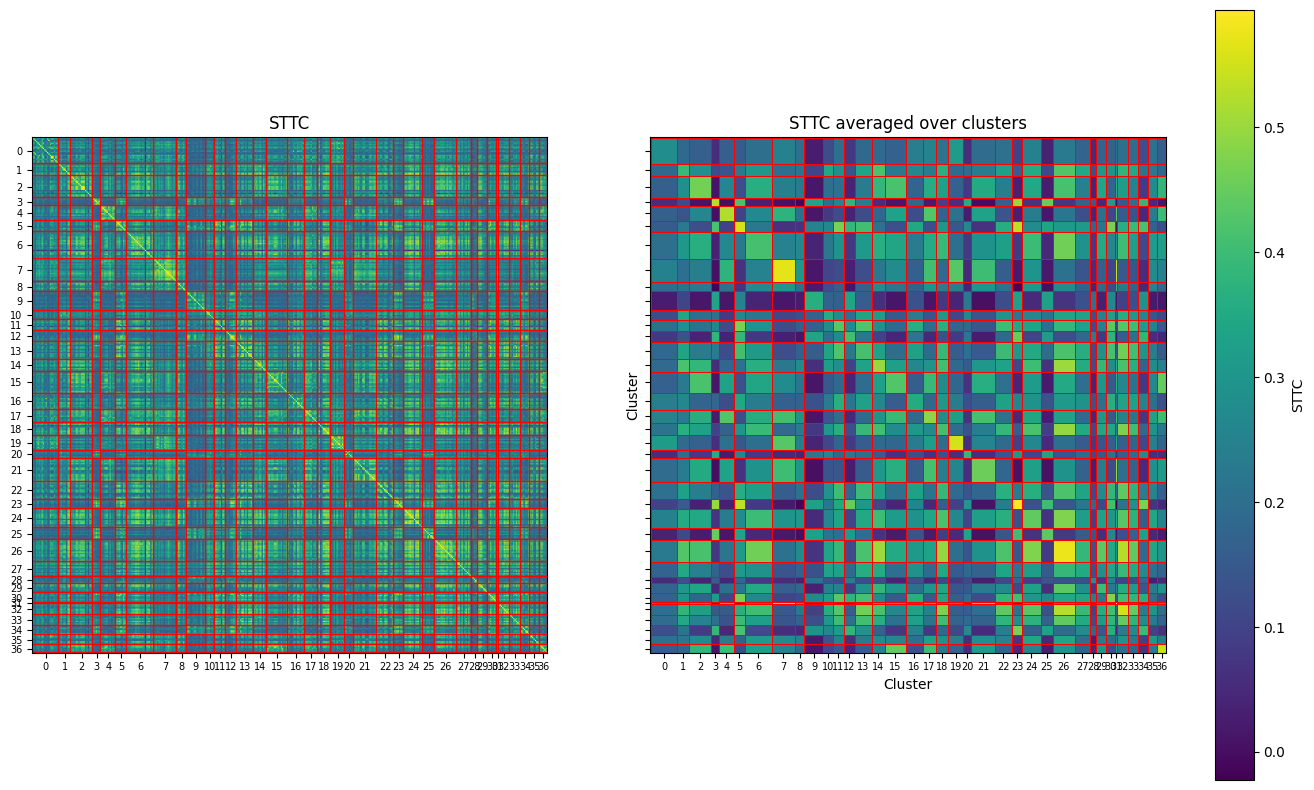

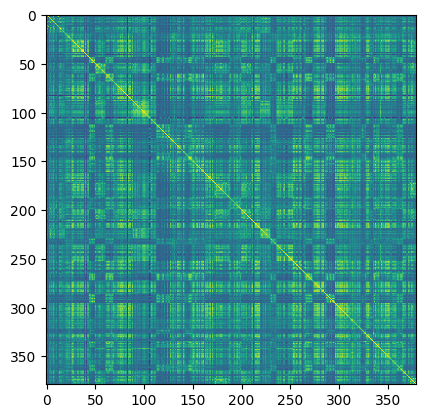

In [5]:
labels, centers = MEA_data.get_clusters(37, plot=False)
MEA_data.plot_clusters()
MEA_data.plot_STTC_clustered()

order = np.argsort(labels)
sttc_result_ordered = MEA_data.sttc[order][:,order]

plt.imshow(sttc_result_ordered)

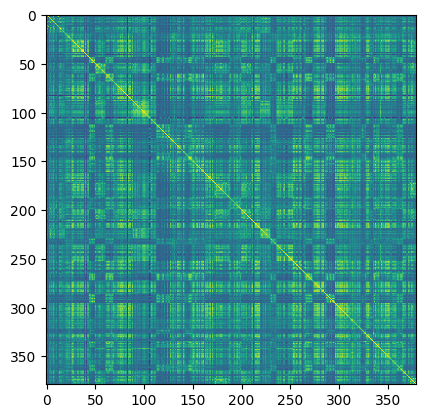

In [6]:
order = np.argsort(labels)
sttc_result_ordered = MEA_data.sttc[order][:,order]

plt.imshow(sttc_result_ordered)

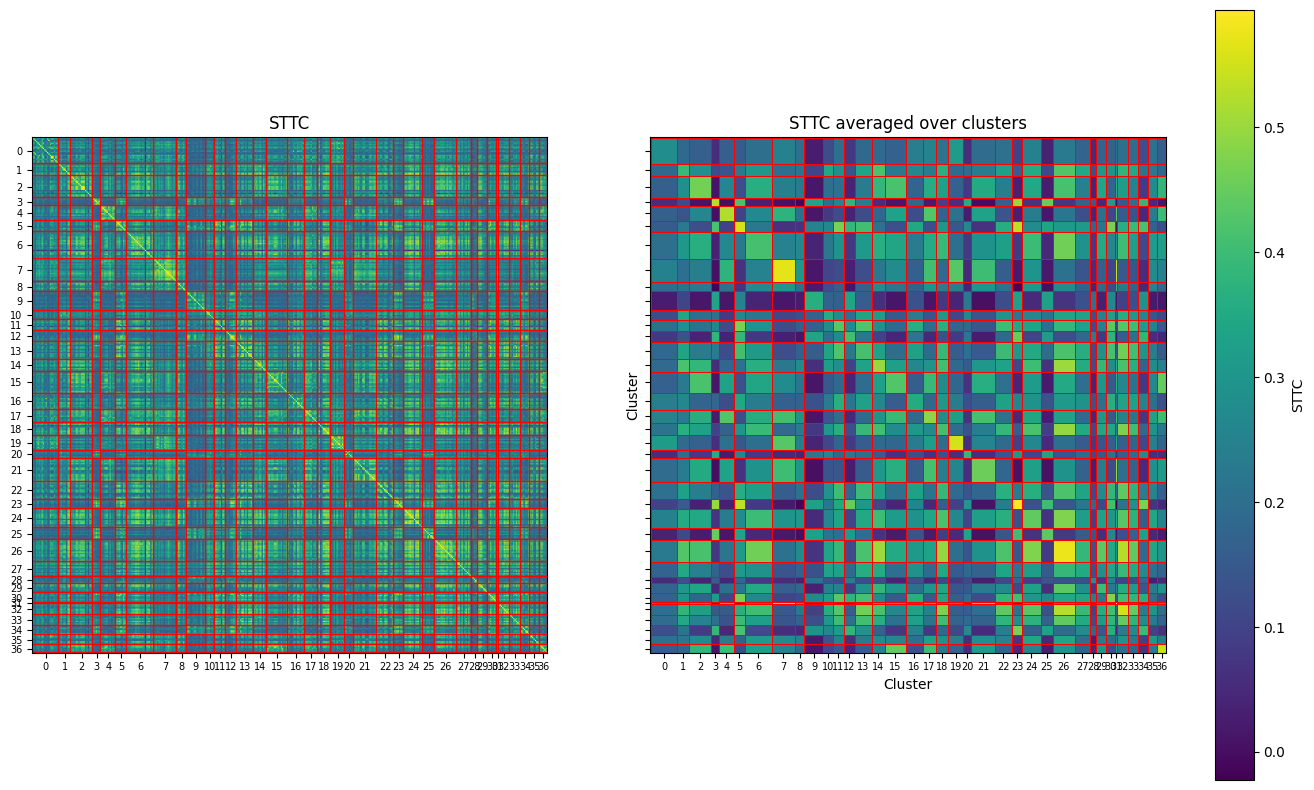

In [7]:
MEA_data.plot_STTC_clustered()

In [8]:
np.shape(MEA_data.get_STTC_clustered())

order = np.argsort(self.cluster_labels)
sttc_result_ordered = self.sttc[order][:,order]

c:\Users\bow-lab\Documents\Code\scripts\MEAData.py:446: RuntimeWarning: Mean of empty slice
  sttc_cluster = np.nanmean(sttc_result_ordered[labels_ordered == i][:,labels_ordered == j])


NameError: name 'self' is not defined

In [ ]:
def get_STTC_clustered(sttc, labels, centers) -> np.array:

    order = np.argsort(labels)
    sttc_result_ordered = sttc[order][:,order]
    labels_ordered = labels[order]
    np.fill_diagonal(sttc_result_ordered, np.nan)

    sttc_clustered_result = np.zeros( (len(centers), len(centers)) )

    for i in range(len(centers)):
        for j in range(len(centers)):
            if i >= j:
                sttc_cluster = np.nanmean(sttc_result_ordered[labels_ordered == i][:,labels_ordered == j])
        
                sttc_clustered_result[i, j] = sttc_cluster
                sttc_clustered_result[j, i] = sttc_cluster

    return sttc_clustered_result

In [ ]:
sttc_clus = get_STTC_clustered(MEA_data.sttc, labels, centers)

In [ ]:
plt.imshow(sttc_clus)

In [ ]:


    
def plot_STTC_clustered(self):
    if self.sttc_clustered_result is None:
        self.get_STTC_clustered()
    elif int(np.shape(self.sttc_clustered_result)[0]) != int(len(self.cluster_centers)):
        self.get_STTC_clustered()

    order = np.argsort(self.cluster_labels)
    sttc_result_ordered = self.sttc[order][:,order]

    tick_labels, counts = np.unique(self.cluster_labels, return_counts=True)
    lines = np.cumsum(counts)-.5
    ticks = lines - counts/2 

    fig, axs = plt.subplots(1, 2, figsize=(16, 10), sharex=True, sharey = True)

    axs[0].imshow(sttc_result_ordered)
    axs[0].set_title('STTC')
    axs[0].set_aspect('equal')
    axs[0].hlines(lines, -.5, len(self.units)-.5, color='r', linewidth=1)
    axs[0].vlines(lines, -.5, len(self.units)-.5, color='r', linewidth=1)
    axs[0].set_xticks(ticks, tick_labels, fontsize=7)
    axs[0].set_yticks(ticks, tick_labels, fontsize=7)


    tick_labels, counts = np.unique(self.cluster_labels, return_counts=True)
    lines = np.cumsum(counts)

    edges = np.hstack([[0], lines])

    diffs = np.diff(edges)
    ticks = lines - diffs/2
    
    mesh = axs[1].pcolormesh(edges, edges, self.sttc_clustered_result,
                                shading='auto', cmap='viridis', edgecolors='r', linewidths=.7)

    cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('STTC')

    axs[1].set_xlabel("Cluster")
    axs[1].set_ylabel("Cluster")
    axs[1].set_title("STTC averaged over clusters")
    axs[1].set_aspect('equal')
    axs[1].set_xticks(ticks, tick_labels, fontsize=7)
    axs[1].set_yticks(ticks, tick_labels, fontsize=7)

    plt.show()
